In [1]:
# Load the modules we're going to need
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import os
import glob
import librosa
import pandas as pd# Added
from IPython.display import Audio
from sklearn.externals import joblib

In [2]:
# We've previously preprocessed our data and coverted all files to a sample rate of 44100
samplerate = 44100

In [3]:
# Specify where the audio files for training and testing reside
train_folder = './train'
test_folder = './test'

# Get a list of all the training audio files (must be .WAV files)
train_files = glob.glob(os.path.join(train_folder, '*.wav'))

# Get a list of all the test audio files (must be .WAV files)
test_files = glob.glob(os.path.join(test_folder, '*.wav'))

# Specify the labels (classes) we're going to classify the data into
label0 = 'abscent'
label1 = 'present'
labels = [label0, label1]

In [4]:
window_size = 2048
hop_size = 441
n_bands = 40
n_mfcc = 13

## Comparing dataset labels with grouped labels

In [5]:
# Make 1 second summarization as features with half second of hop length
# 172 frames == 1 second (using 44100 samples per second)
feature_length = 96
half_sec = 48

In [6]:
def print_labels(vec_orig, vec_calc):
    """ Receive two vocal/unvocal arrays with different size and plot them normalized"""
    orig = vec_orig.copy()
    orig[vec_orig>0] = 1
    orig[vec_orig<=0] = None

    calc = vec_calc.copy()
    calc[vec_calc>0] = 1
    calc[vec_calc<=0] = None

    x1 = np.linspace(0, 1, len(orig))
    x2 = np.linspace(0, 1, len(calc))
    
    plt.figure(figsize=(12,4))
    plt.plot(x1, orig, linewidth=6, label='Original')
    plt.plot(x2, calc, linewidth=3, label='Calculated')
    plt.legend()
    plt.show()

### For MFCC segments on train set

filename: CroqueMadame_Pilot_MIX.wav
mfcc shape:  (13, 48163)
number of chunks 1003
file label size: 1003
Original proportion of vocals:  0.0
Resumed proportion of vocals:  0.0
 


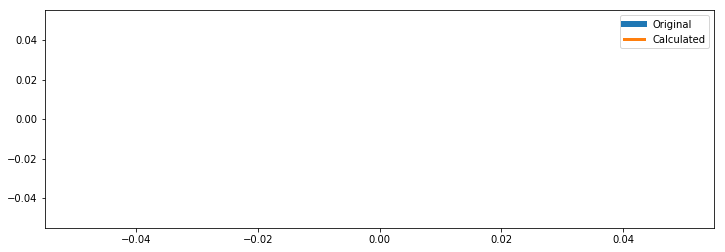

filename: StevenClark_Bounty_MIX.wav
mfcc shape:  (13, 28947)
number of chunks 603
file label size: 603
Original proportion of vocals:  0.8424307330892006
Resumed proportion of vocals:  0.8590381426202321
 


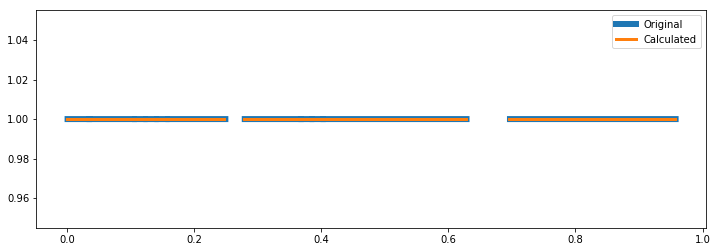

filename: HezekiahJones_BorrowedHeart_MIX.wav
mfcc shape:  (13, 24158)
number of chunks 503
file label size: 503
Original proportion of vocals:  0.8235708076333982
Resumed proportion of vocals:  0.827037773359841
 


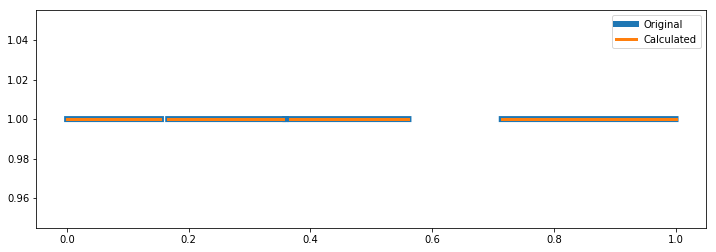

filename: TheDistricts_Vermont_MIX.wav
mfcc shape:  (13, 22816)
number of chunks 475
file label size: 475
Original proportion of vocals:  0.6442252903791366
Resumed proportion of vocals:  0.6547368421052632
 


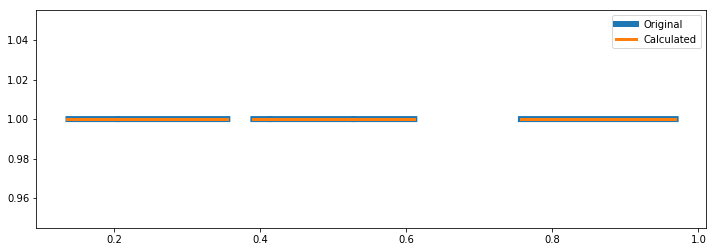

filename: NightPanther_Fire_MIX.wav
mfcc shape:  (13, 21300)
number of chunks 443
file label size: 443
Original proportion of vocals:  0.70660594394103
Resumed proportion of vocals:  0.7133182844243793
 


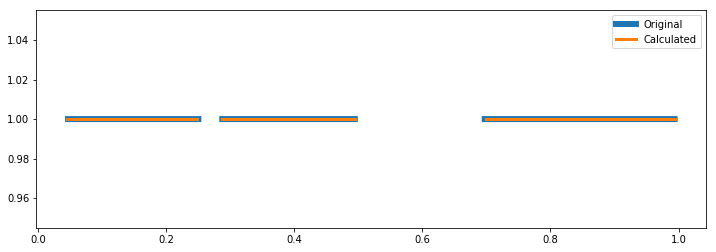

filename: ClaraBerryAndWooldog_WaltzForMyVictims_MIX.wav
mfcc shape:  (13, 17544)
number of chunks 365
file label size: 365
Original proportion of vocals:  0.39229322236789604
Resumed proportion of vocals:  0.4136986301369863
 


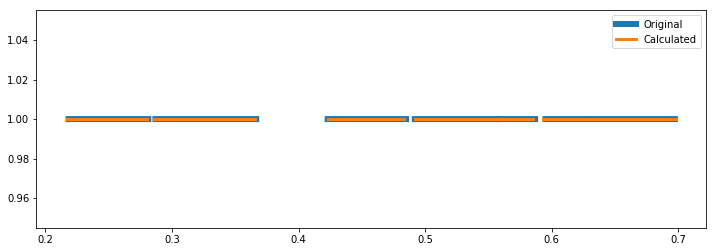

filename: MusicDelta_80sRock_MIX.wav
mfcc shape:  (13, 3692)
number of chunks 76
file label size: 76
Original proportion of vocals:  0.9146572744513682
Resumed proportion of vocals:  0.9736842105263158
 


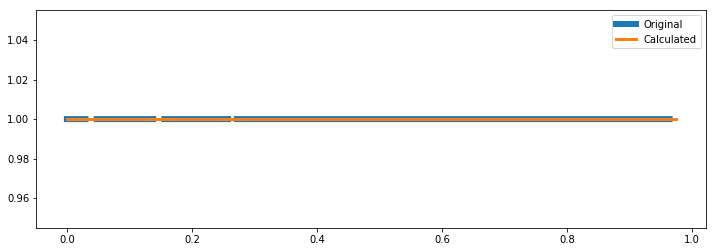

filename: Auctioneer_OurFutureFaces_MIX.wav
mfcc shape:  (13, 20789)
number of chunks 433
file label size: 433
Original proportion of vocals:  0.5879834519915336
Resumed proportion of vocals:  0.6073903002309469
 


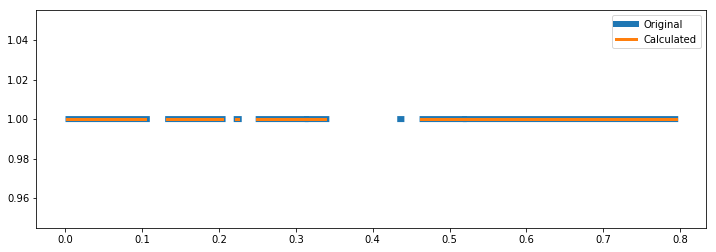

filename: EthanHein_GirlOnABridge_MIX.wav
mfcc shape:  (13, 13007)
number of chunks 270
file label size: 270
Original proportion of vocals:  0.0
Resumed proportion of vocals:  0.0
 


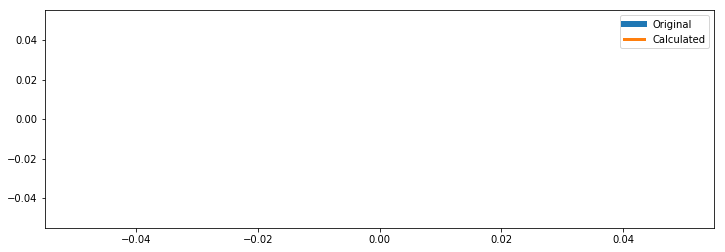

filename: MusicDelta_Rockabilly_MIX.wav
mfcc shape:  (13, 2595)
number of chunks 54
file label size: 54
Original proportion of vocals:  0.8986121819583655
Resumed proportion of vocals:  0.9629629629629629
 


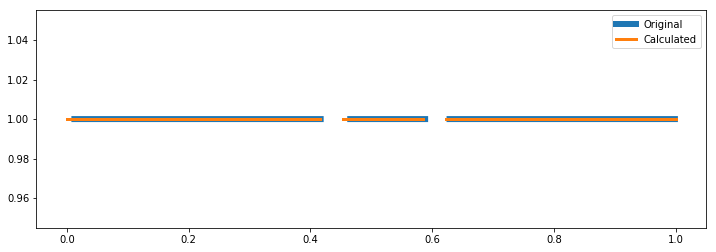

filename: SecretMountains_HighHorse_MIX.wav
mfcc shape:  (13, 35551)
number of chunks 740
file label size: 740
Original proportion of vocals:  0.5256540084388186
Resumed proportion of vocals:  0.5310810810810811
 


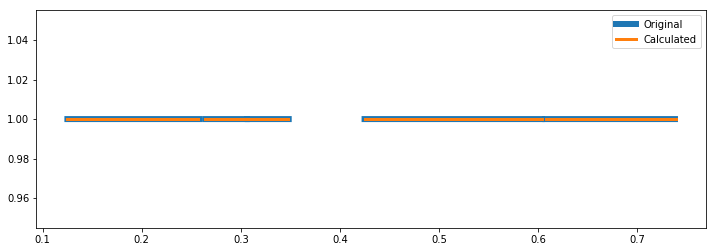

filename: ClaraBerryAndWooldog_Stella_MIX.wav
mfcc shape:  (13, 19575)
number of chunks 407
file label size: 407
Original proportion of vocals:  0.7166649637273935
Resumed proportion of vocals:  0.7493857493857494
 


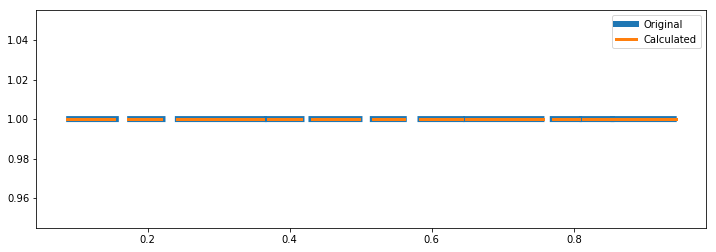

filename: LizNelson_Coldwar_MIX.wav
mfcc shape:  (13, 16999)
number of chunks 354
file label size: 354
Original proportion of vocals:  0.8177432639134016
Resumed proportion of vocals:  0.827683615819209
 


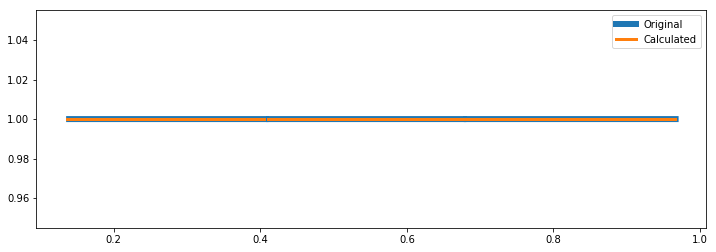

filename: MatthewEntwistle_TheFlaxenField_MIX.wav
mfcc shape:  (13, 32353)
number of chunks 674
file label size: 674
Original proportion of vocals:  0.0
Resumed proportion of vocals:  0.0
 


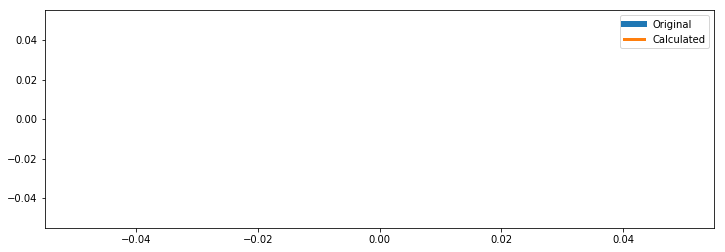

filename: MusicDelta_Britpop_MIX.wav
mfcc shape:  (13, 3679)
number of chunks 76
file label size: 76
Original proportion of vocals:  0.9687330070690593
Resumed proportion of vocals:  0.9868421052631579
 


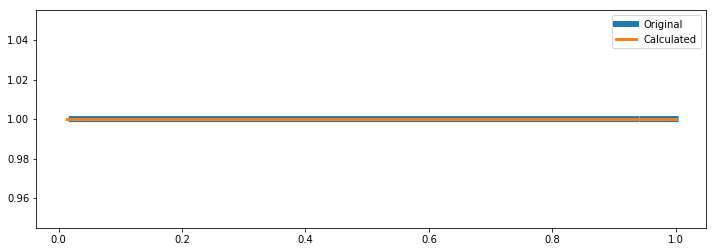

filename: MusicDelta_Reggae_MIX.wav
mfcc shape:  (13, 1747)
number of chunks 36
file label size: 36
Original proportion of vocals:  0.7898052691867125
Resumed proportion of vocals:  0.8888888888888888
 


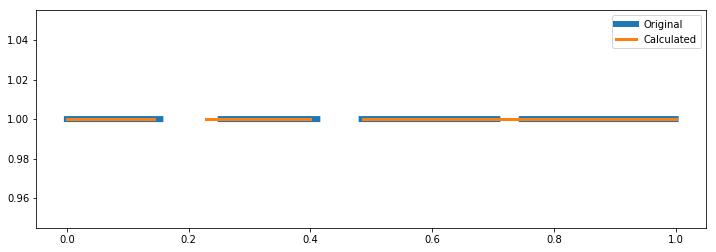

filename: EthanHein_1930sSynthAndUprightBass_MIX.wav
mfcc shape:  (13, 28702)
number of chunks 597
file label size: 597
Original proportion of vocals:  0.0
Resumed proportion of vocals:  0.0
 


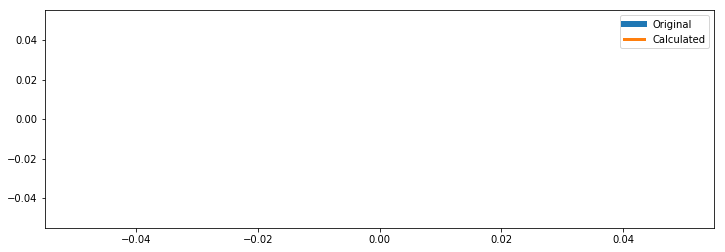

filename: FacesOnFilm_WaitingForGa_MIX.wav
mfcc shape:  (13, 25764)
number of chunks 536
file label size: 536
Original proportion of vocals:  0.9272600240655203
Resumed proportion of vocals:  0.9309701492537313
 


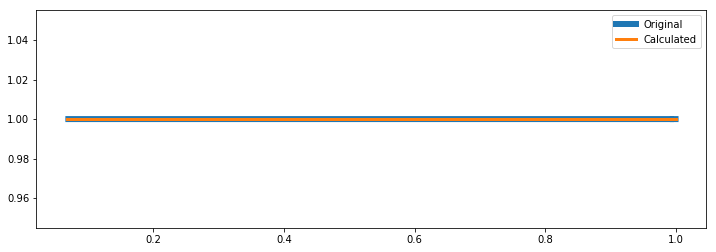

filename: AlexanderRoss_VelvetCurtain_MIX.wav
mfcc shape:  (13, 51449)
number of chunks 1071
file label size: 1071
Original proportion of vocals:  0.698627740631317
Resumed proportion of vocals:  0.7273576097105509
 


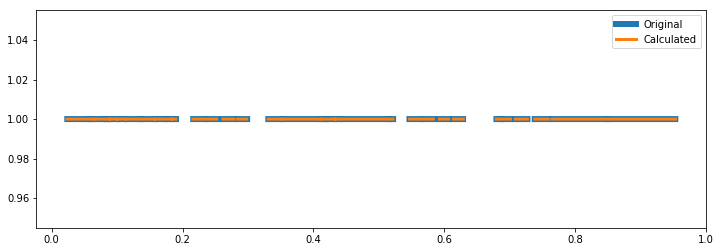

filename: Mozart_DiesBildnis_MIX.wav
mfcc shape:  (13, 22914)
number of chunks 477
file label size: 477
Original proportion of vocals:  0.8642255488150832
Resumed proportion of vocals:  0.8763102725366876
 


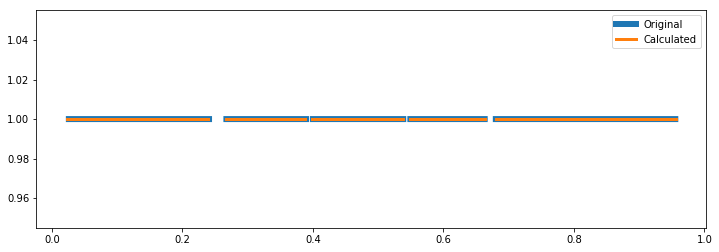

filename: JoelHelander_Definition_MIX.wav
mfcc shape:  (13, 23516)
number of chunks 489
file label size: 489
Original proportion of vocals:  0.0
Resumed proportion of vocals:  0.0
 


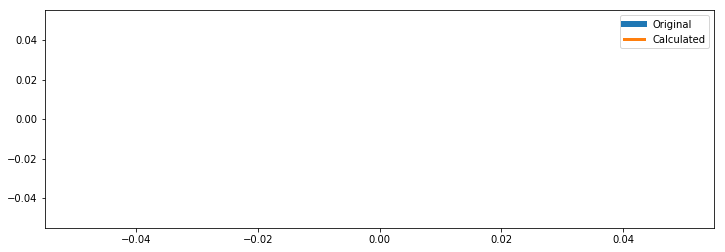

filename: DreamersOfTheGhetto_HeavyLove_MIX.wav
mfcc shape:  (13, 29499)
number of chunks 614
file label size: 614
Original proportion of vocals:  0.7408298867719846
Resumed proportion of vocals:  0.7736156351791531
 


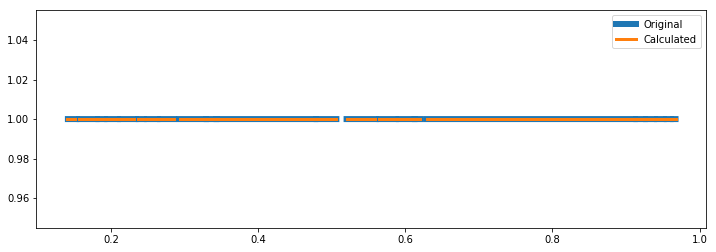

filename: CroqueMadame_Oil_MIX.wav
mfcc shape:  (13, 45135)
number of chunks 940
file label size: 940
Original proportion of vocals:  0.0
Resumed proportion of vocals:  0.0
 


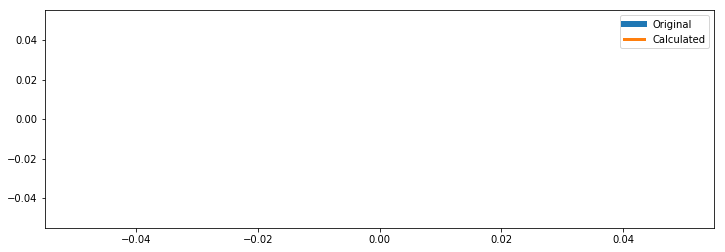

filename: MusicDelta_Beatles_MIX.wav
mfcc shape:  (13, 3638)
number of chunks 75
file label size: 75
Original proportion of vocals:  0.9617816882045642
Resumed proportion of vocals:  1.0
 


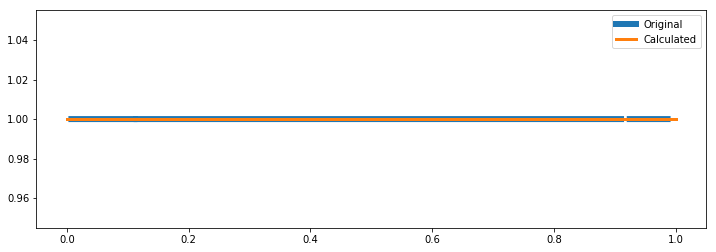

filename: Meaxic_YouListen_MIX.wav
mfcc shape:  (13, 41272)
number of chunks 859
file label size: 859
Original proportion of vocals:  0.4275641491604274
Resumed proportion of vocals:  0.4447031431897555
 


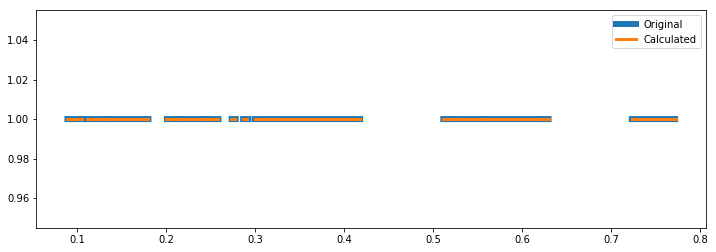

filename: HopAlong_SisterCities_MIX.wav
mfcc shape:  (13, 28343)
number of chunks 590
file label size: 590
Original proportion of vocals:  0.6229271046503423
Resumed proportion of vocals:  0.6423728813559322
 


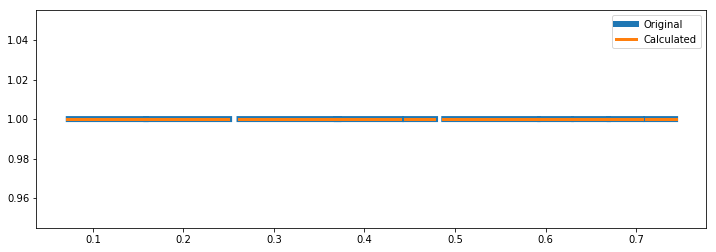

filename: MusicDelta_Hendrix_MIX.wav
mfcc shape:  (13, 1985)
number of chunks 41
file label size: 41
Original proportion of vocals:  0.7746975806451613
Resumed proportion of vocals:  0.8536585365853658
 


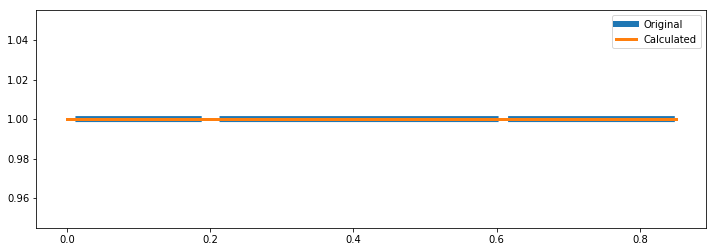

filename: MatthewEntwistle_ImpressionsOfSaturn_MIX.wav
mfcc shape:  (13, 36769)
number of chunks 766
file label size: 766
Original proportion of vocals:  0.0
Resumed proportion of vocals:  0.0
 


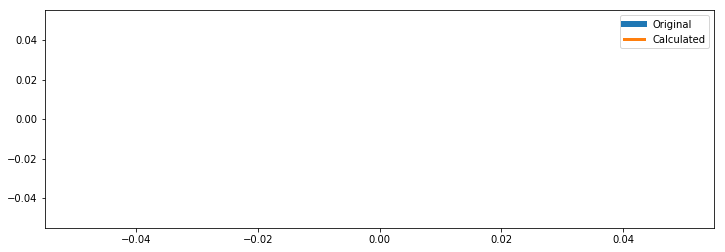

filename: TheScarletBrand_LesFleursDuMal_MIX.wav
mfcc shape:  (13, 30364)
number of chunks 632
file label size: 632
Original proportion of vocals:  0.5051213648190231
Resumed proportion of vocals:  0.5189873417721519
 


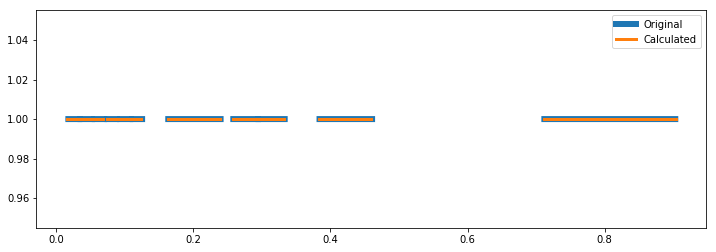

filename: PurlingHiss_Lolita_MIX.wav
mfcc shape:  (13, 25623)
number of chunks 533
file label size: 533
Original proportion of vocals:  0.4550386386698931
Resumed proportion of vocals:  0.4915572232645403
 


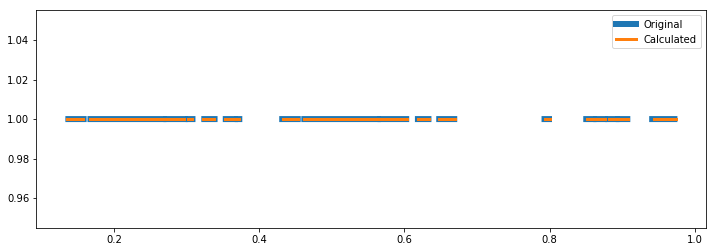

filename: JoelHelander_IntheAtticBedroom_MIX.wav
mfcc shape:  (13, 23180)
number of chunks 482
file label size: 482
Original proportion of vocals:  0.0
Resumed proportion of vocals:  0.0
 


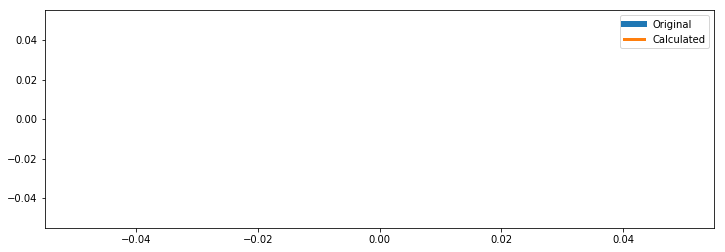

filename: BrandonWebster_DontHearAThing_MIX.wav
mfcc shape:  (13, 17166)
number of chunks 357
file label size: 357
Original proportion of vocals:  0.8635595688901835
Resumed proportion of vocals:  0.8823529411764706
 


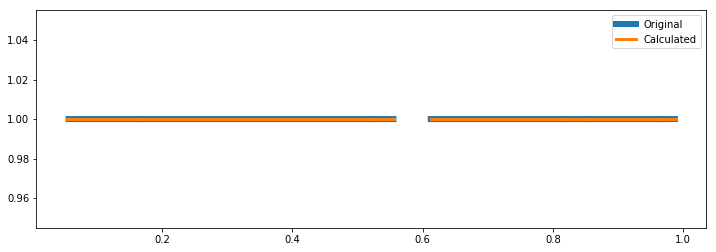

filename: KarimDouaidy_Yatora_MIX.wav
mfcc shape:  (13, 20801)
number of chunks 433
file label size: 433
Original proportion of vocals:  0.0
Resumed proportion of vocals:  0.0
 


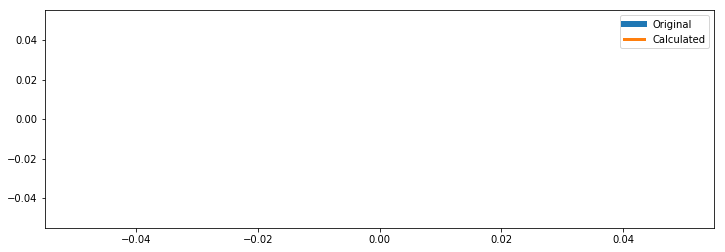

filename: Debussy_LenfantProdigue_MIX.wav
mfcc shape:  (13, 22353)
number of chunks 465
file label size: 465
Original proportion of vocals:  0.8705261274158912
Resumed proportion of vocals:  0.886021505376344
 


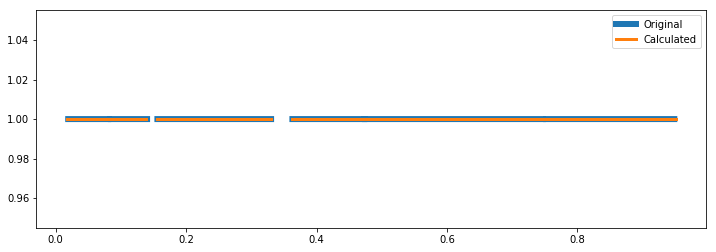

filename: Meaxic_TakeAStep_MIX.wav
mfcc shape:  (13, 28272)
number of chunks 589
file label size: 589
Original proportion of vocals:  0.6544515581337766
Resumed proportion of vocals:  0.6587436332767402
 


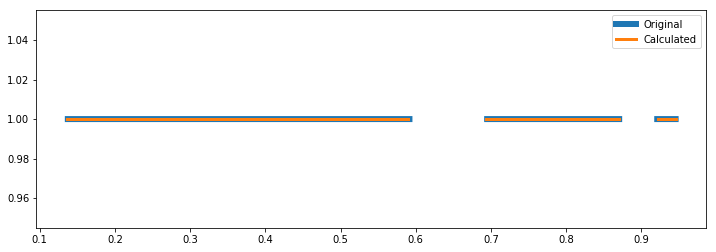

filename: JoelHelander_ExcessiveResistancetoChange_MIX.wav
mfcc shape:  (13, 25019)
number of chunks 521
file label size: 521
Original proportion of vocals:  0.0
Resumed proportion of vocals:  0.0
 


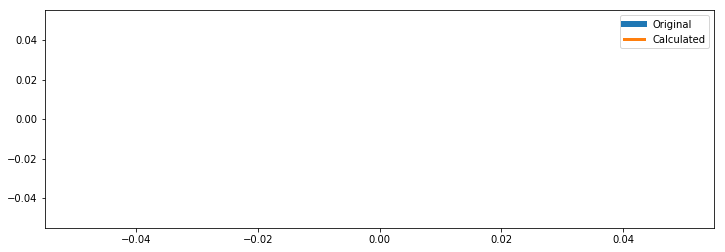

filename: AvaLuna_Waterduct_MIX.wav
mfcc shape:  (13, 25931)
number of chunks 540
file label size: 540
Original proportion of vocals:  0.4957192441187813
Resumed proportion of vocals:  0.5537037037037037
 


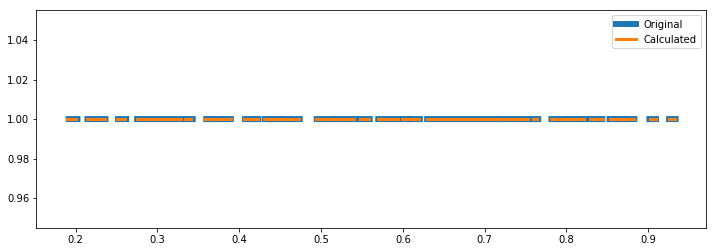

filename: LizNelson_Rainfall_MIX.wav
mfcc shape:  (13, 28491)
number of chunks 593
file label size: 593
Original proportion of vocals:  0.8086697086697087
Resumed proportion of vocals:  0.8381112984822934
 


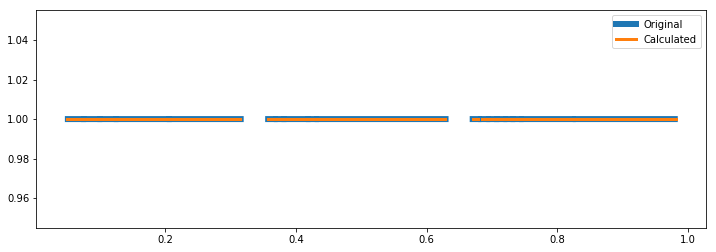

filename: ClaraBerryAndWooldog_TheBadGuys_MIX.wav
mfcc shape:  (13, 25469)
number of chunks 530
file label size: 530
Original proportion of vocals:  0.7174493482016648
Resumed proportion of vocals:  0.7358490566037735
 


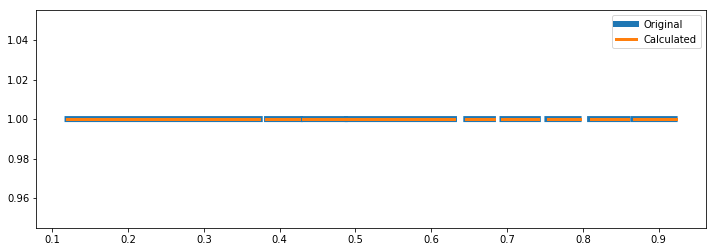

filename: EthanHein_HarmonicaFigure_MIX.wav
mfcc shape:  (13, 15095)
number of chunks 314
file label size: 314
Original proportion of vocals:  0.0
Resumed proportion of vocals:  0.0
 


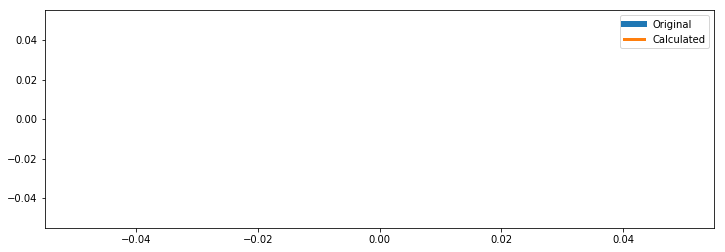

filename: MusicDelta_Disco_MIX.wav
mfcc shape:  (13, 12478)
number of chunks 259
file label size: 259
Original proportion of vocals:  0.811252704977158
Resumed proportion of vocals:  0.8571428571428571
 


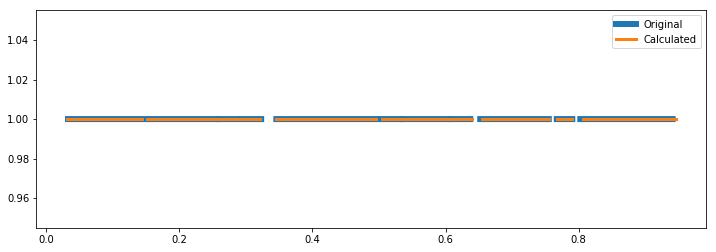

filename: AimeeNorwich_Flying_MIX.wav
mfcc shape:  (13, 21781)
number of chunks 453
file label size: 453
Original proportion of vocals:  0.0
Resumed proportion of vocals:  0.0
 


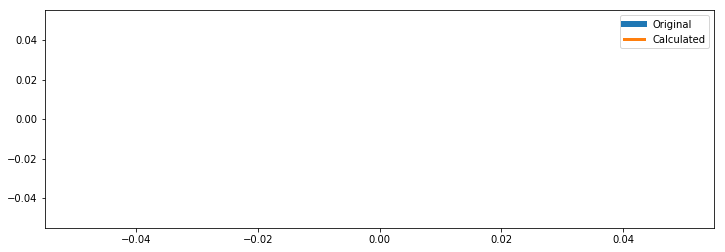

filename: MusicDelta_Punk_MIX.wav
mfcc shape:  (13, 2877)
number of chunks 59
file label size: 59
Original proportion of vocals:  0.8268428372739917
Resumed proportion of vocals:  0.864406779661017
 


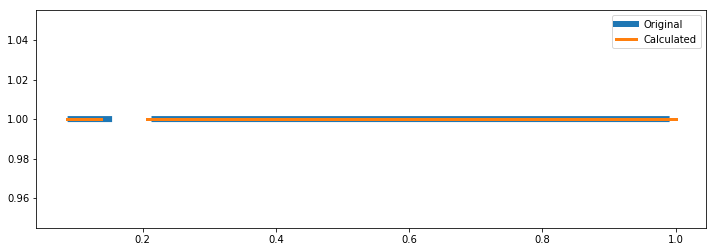

filename: HeladoNegro_MitadDelMundo_MIX.wav
mfcc shape:  (13, 18186)
number of chunks 378
file label size: 378
Original proportion of vocals:  0.7217486939785538
Resumed proportion of vocals:  0.753968253968254
 


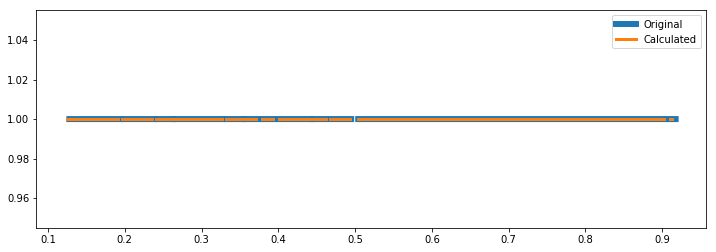

filename: BrandonWebster_YesSirICanFly_MIX.wav
mfcc shape:  (13, 9965)
number of chunks 207
file label size: 207
Original proportion of vocals:  0.9614612605379366
Resumed proportion of vocals:  0.9758454106280193
 


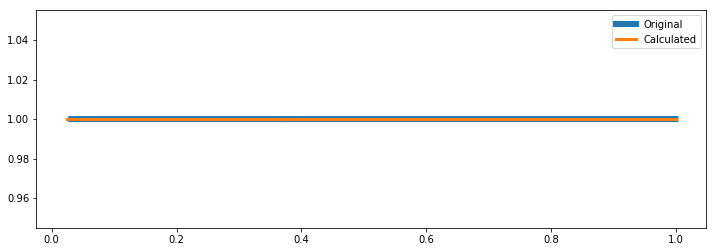

filename: ClaraBerryAndWooldog_AirTraffic_MIX.wav
mfcc shape:  (13, 17345)
number of chunks 361
file label size: 361
Original proportion of vocals:  0.8046010147601476
Resumed proportion of vocals:  0.8282548476454293
 


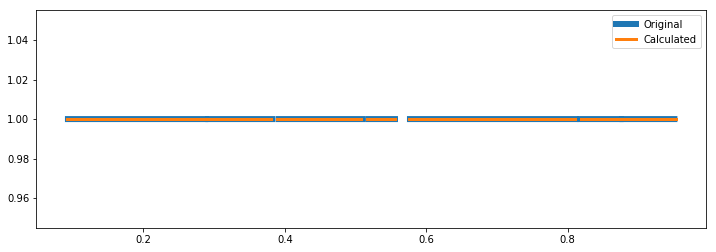

filename: Creepoid_OldTree_MIX.wav
mfcc shape:  (13, 30221)
number of chunks 629
file label size: 629
Original proportion of vocals:  0.5827266710787558
Resumed proportion of vocals:  0.5914149443561209
 


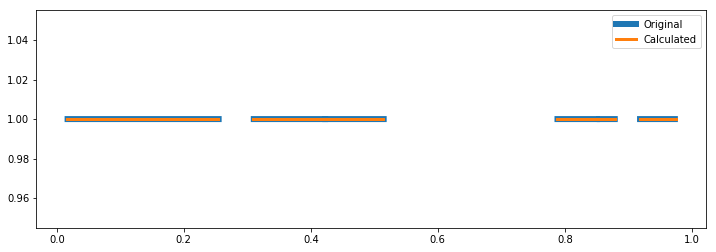

filename: EthanHein_BluesForNofi_MIX.wav
mfcc shape:  (13, 16681)
number of chunks 347
file label size: 347
Original proportion of vocals:  0.0
Resumed proportion of vocals:  0.0
 


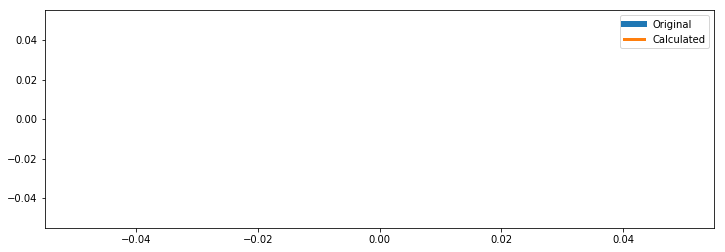

filename: ClaraBerryAndWooldog_Boys_MIX.wav
mfcc shape:  (13, 15348)
number of chunks 319
file label size: 319
Original proportion of vocals:  0.7752655242066854
Resumed proportion of vocals:  0.7836990595611285
 


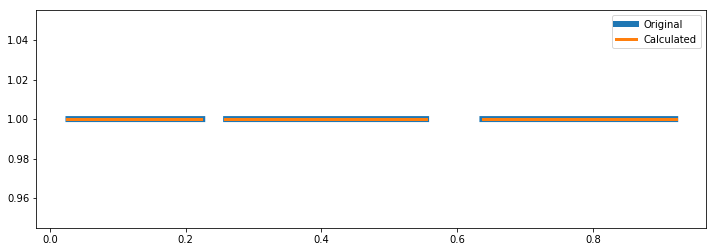

filename: AClassicEducation_NightOwl_MIX.wav
mfcc shape:  (13, 17145)
number of chunks 357
file label size: 357
Original proportion of vocals:  0.7028114792347177
Resumed proportion of vocals:  0.7282913165266106
 


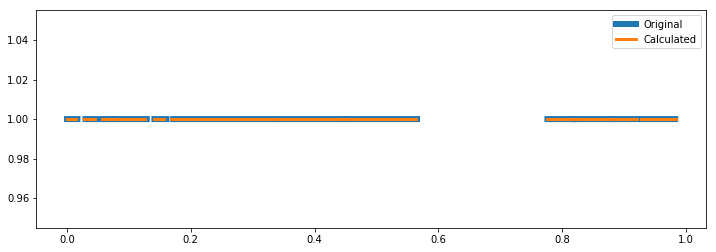

filename: Schubert_Erstarrung_MIX.wav
mfcc shape:  (13, 17390)
number of chunks 362
file label size: 362
Original proportion of vocals:  0.9067226407498994
Resumed proportion of vocals:  0.9088397790055248
 


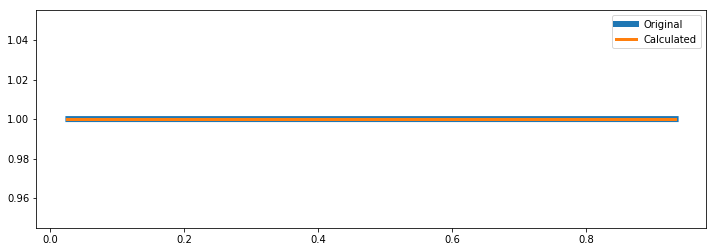

filename: KarimDouaidy_Hopscotch_MIX.wav
mfcc shape:  (13, 29401)
number of chunks 612
file label size: 612
Original proportion of vocals:  0.0
Resumed proportion of vocals:  0.0
 


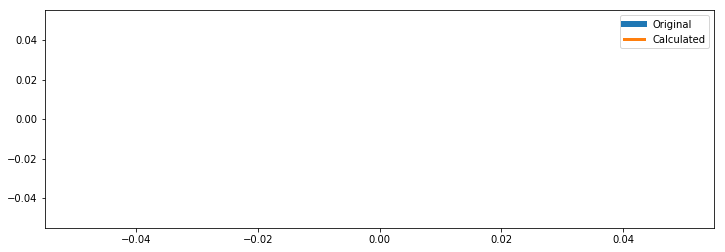

filename: MatthewEntwistle_TheArch_MIX.wav
mfcc shape:  (13, 26615)
number of chunks 554
file label size: 554
Original proportion of vocals:  0.0
Resumed proportion of vocals:  0.0
 


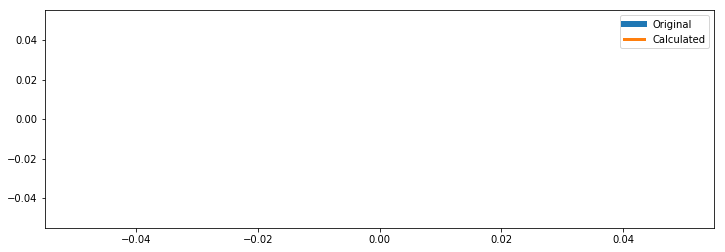

filename: LizNelson_ImComingHome_MIX.wav
mfcc shape:  (13, 17970)
number of chunks 374
file label size: 374
Original proportion of vocals:  0.9898157938672157
Resumed proportion of vocals:  0.9919786096256684
 


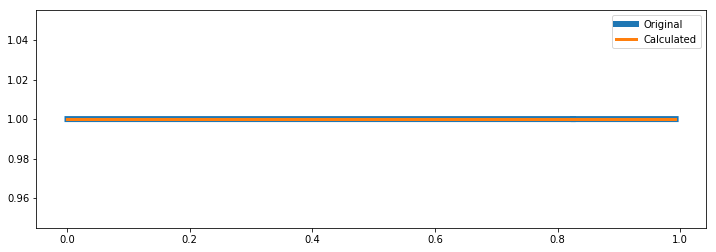

filename: FamilyBand_Again_MIX.wav
mfcc shape:  (13, 20129)
number of chunks 419
file label size: 419
Original proportion of vocals:  0.6991752782193958
Resumed proportion of vocals:  0.747016706443914
 


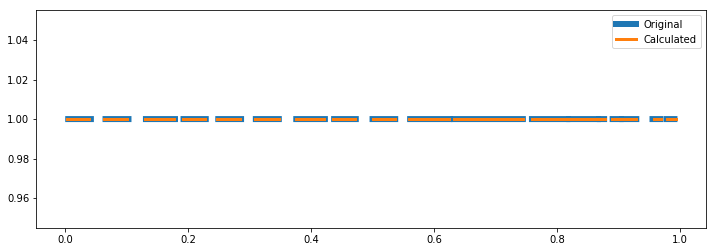

filename: MatthewEntwistle_FairerHopes_MIX.wav
mfcc shape:  (13, 30047)
number of chunks 625
file label size: 625
Original proportion of vocals:  0.0
Resumed proportion of vocals:  0.0
 


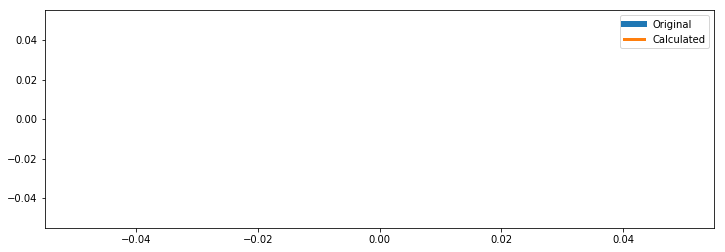

filename: TheSoSoGlos_Emergency_MIX.wav
mfcc shape:  (13, 16701)
number of chunks 347
file label size: 347
Original proportion of vocals:  0.8811976047904192
Resumed proportion of vocals:  0.899135446685879
 


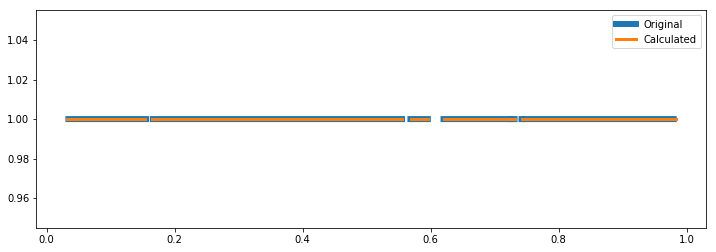

filename: AlexanderRoss_GoodbyeBolero_MIX.wav
mfcc shape:  (13, 41882)
number of chunks 872
file label size: 872
Original proportion of vocals:  0.38864879062104535
Resumed proportion of vocals:  0.411697247706422
 


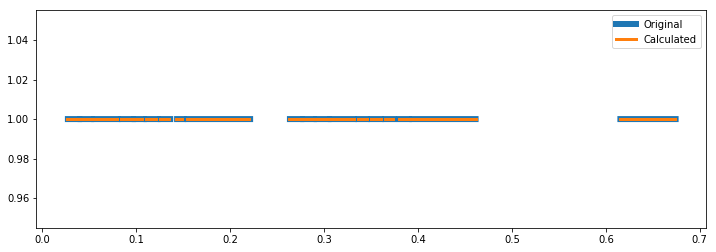

vocal  12757
unvocal  14333


In [26]:
# Define lists to store the training features and corresponding training labels
train_features = []
train_labels = []

vocal_chuncks = 0
unvocal_chuncks = 0
# For every audio file in the training set, load the file, compute MFCCs, summarize them over time
# using the mean and standard deviation (for each MFCC coefficient), and then save the features
# and corresponding label in the designated lists
for tf in train_files:
    
    print("filename: {:s}".format(os.path.basename(tf)))
    
    # Load audio
    audio, sr = librosa.load(tf, sr=samplerate, mono=True)

    # Extract mfcc coefficients (remember we will discard the first one)
    # To see all the relevant kwarg arugments consult the documentation for
    # librosa.feature.mfcc, librosa.feature.melspectrogram and librosa.filters.mel
    mfcc = librosa.feature.mfcc(audio, sr=sr, n_fft=window_size, hop_length=hop_size,
                                fmax=samplerate/2, n_mels=n_bands, n_mfcc=(n_mfcc + 1))
          
    # Discard the first coefficient
    mfcc = mfcc[1:,:]
    
    # Read labels for each frame
    f0line = pd.read_csv(tf[:-7]+"vocal.csv",index_col=None, header=None)
    f0line = pd.DataFrame.as_matrix(f0line)
    f0line = f0line.T[0]
    
    
    print ("mfcc shape: ", mfcc.shape)
    print("number of chunks", int(mfcc.shape[1]/half_sec))
    
    feature_vector = []
    tf_label = []
    
    for chunk in range(int(mfcc.shape[1]/half_sec)):
        start = chunk*half_sec
        mfcc_means = np.mean(mfcc[:,start:start+feature_length], 1)
        mfcc_stddevs = np.std(mfcc[:,start:start+feature_length], 1)
    
        # Concatenate means and std. dev's into a single feature vector
        feature_vector.append(np.concatenate((mfcc_means, mfcc_stddevs), axis=0))
   
        # Adjust labels to our classes
        if len([x for x in f0line[start:start+feature_length] if x > 0]) > half_sec/2:
            tf_label.append('present')
        else:
            tf_label.append('abscent')
            

    # Get labels index
    tf_label_ind = [labels.index(lbl) for lbl in tf_label]
    print("file label size: {:d}".format(len(tf_label_ind)))
    
    vocal = sum([1 for x in f0line if x >= 1])
    print("Original proportion of vocals: ", vocal/len(f0line))
    
    vocal = sum([x for x in tf_label_ind if x == 1])
    vocal_chuncks += vocal
    unvocal_chuncks += len(tf_label_ind) - vocal
    print("Resumed proportion of vocals: ", vocal/len(tf_label_ind))
    
    # Store the feature vector and corresponding label in integer format
    for idx in range(len(feature_vector)):
        train_features.append(feature_vector[idx])
        train_labels.append(tf_label_ind[idx])
    print(" ")
   
    print_labels(np.array(f0line).astype('float'), np.array(tf_label_ind).astype('float'))

    
print ("vocal ", vocal_chuncks)
print ("unvocal ", unvocal_chuncks)

In [8]:
print ("Rate train vocal", vocal_chuncks/(vocal_chuncks+unvocal_chuncks))
print ("Rate train unvocal", unvocal_chuncks/(vocal_chuncks+unvocal_chuncks))

Rate train vocal 0.47091177556293834
Rate train unvocal 0.5290882244370616


### For MFCC segments on test set

In [25]:
# Define lists to store the test features and corresponding test labels
test_features = []
test_labels = []

vocal_chuncks = 0
unvocal_chuncks = 0
# For every audio file in the training set, load the file, compute MFCCs, summarize them over time
# using the mean and standard deviation (for each MFCC coefficient), and then save the features
# and corresponding label in the designated lists
for tf in test_files:
    
    print("filename: {:s}".format(os.path.basename(tf)))
    
    # Load audio
    audio, sr = librosa.load(tf, sr=samplerate, mono=True)

    # Extract mfcc coefficients (remember we will discard the first one)
    # To see all the relevant kwarg arugments consult the documentation for
    # librosa.feature.mfcc, librosa.feature.melspectrogram and librosa.filters.mel
    mfcc = librosa.feature.mfcc(audio, sr=sr, n_fft=window_size, hop_length=hop_size,
                                fmax=samplerate/2, n_mels=n_bands, n_mfcc=(n_mfcc + 1))
          
    # Discard the first coefficient
    mfcc = mfcc[1:,:]
    print("mfcc matrix shape: {}".format(mfcc.shape))
    
     # Read labels for each frame
    f0line = pd.read_csv(tf[:-7]+"vocal.csv",index_col=None, header=None)
    f0line = pd.DataFrame.as_matrix(f0line)
    f0line = f0line.T[0]
    
    #print (mfcc.shape)
    print("number of chunks", int(mfcc.shape[1]/half_sec))
    
    feature_vector = []
    tf_label = []
    
    for chunk in range(int(mfcc.shape[1]/half_sec)):
        start = chunk*half_sec
        mfcc_means = np.mean(mfcc[:,start:start+feature_length], 1)
        mfcc_stddevs = np.std(mfcc[:,start:start+feature_length], 1)
    
        # Concatenate means and std. dev's into a single feature vector
        feature_vector.append(np.concatenate((mfcc_means, mfcc_stddevs), axis=0))
   
        # Adjust labels to our classes
        if len([x for x in f0line[start:start+feature_length] if x > 0]) > half_sec/2:
            tf_label.append('present')
        else:
            tf_label.append('abscent')
    
    #Get labels index
    tf_label_ind = np.array([labels.index(lbl) for lbl in tf_label])
    print("file label size: {}".format(tf_label_ind.shape))
    
    vocal = sum([1 for x in f0line if x > 1])
    print("Original proportion of vocals: ", vocal/len(f0line))
    
    vocal = sum([x for x in tf_label_ind if x == 1])
    vocal_chuncks += vocal
    unvocal_chuncks += len(tf_label_ind) - vocal
    print("Resumed proportion of vocals: ", vocal/len(tf_label_ind))
    
    # Store the feature vector and corresponding label in integer format
    for idx in range(len(feature_vector)):
        test_features.append(feature_vector[idx])
        test_labels.append(tf_label_ind[idx])
    print(" ")
    print_labels(np.array(f0line).astype('float'), np.array(tf_label_ind).astype('float'))
    
print ("vocal ", vocal_chuncks)
print ("unvocal ", unvocal_chuncks)

filename: MusicDelta_InTheHalloftheMountainKing_MIX.wav
mfcc matrix shape: (13, 1745)
number of chunks 36
file label size: (36,)
Original proportion of vocals:  0.0
Resumed proportion of vocals:  0.0
 
filename: MusicDelta_GriegTrolltog_MIX.wav
mfcc matrix shape: (13, 6850)
number of chunks 142
file label size: (142,)
Original proportion of vocals:  0.0
Resumed proportion of vocals:  0.0
 
filename: Mozart_BesterJungling_MIX.wav
mfcc matrix shape: (13, 17414)
number of chunks 362
file label size: (362,)
Original proportion of vocals:  0.0
Resumed proportion of vocals:  0.795580110497
 
filename: Handel_TornamiAVagheggiar_MIX.wav
mfcc matrix shape: (13, 22301)
number of chunks 464
file label size: (464,)
Original proportion of vocals:  0.0
Resumed proportion of vocals:  0.818965517241
 
filename: MatthewEntwistle_Lontano_MIX.wav
mfcc matrix shape: (13, 29801)
number of chunks 620
file label size: (620,)
Original proportion of vocals:  0.0
Resumed proportion of vocals:  0.454838709677
 


In [10]:
print ("Rate test vocal", vocal_chuncks/(vocal_chuncks+unvocal_chuncks))
print ("Rate test unvocal", unvocal_chuncks/(vocal_chuncks+unvocal_chuncks))

Rate test vocal 0.44968879668
Rate test unvocal 0.55031120332


### For results on classification using SVM with all files on test set

In [27]:
# Load trained model (SVM)
filename = 'finalized_model.sav' 
# load the model from disk
clf = joblib.load(filename)

filename = 'scaler.sav' 
# load the model from disk
scaler = joblib.load(filename)
#result = loaded_model.score(X_test, Y_test)
#print(result)

In [28]:
feat_scaled = scaler.transform(test_features)
output = clf.predict(feat_scaled)
origin = test_labels

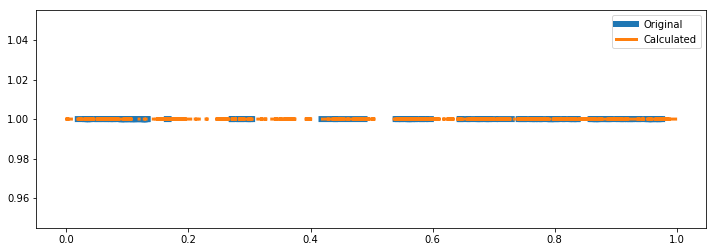

In [29]:
print_labels(np.array(origin).astype('float'), np.array(output).astype('float'))

In [30]:
accuracy = sklearn.metrics.accuracy_score(test_labels, output)
print(accuracy)

0.685079529737


## Evaluate using VGGish features

In [7]:
# Make 1 second summarization as features with half second of hop length
# 172 frames == 1 second (using 44100 samples per second)
# 166 frames ~ 0.96 second
feature_length = 96
half_sec = 48

In [9]:
# Define lists to store the training features and corresponding training labels
train_features = []
train_labels = []

vocal_chuncks = 0
unvocal_chuncks = 0
# For every audio file in the training set, load the VGGish file and then save the features
# and corresponding resumed label in the designated lists
for tf in train_files:
    
    print("filename: {:s}".format(os.path.basename(tf)))
    
    # Load VGGish audio embeddings
    vggish = pd.read_csv(tf[:-7]+"VGGish.csv",index_col=None, header=None)
    vggish = pd.DataFrame.as_matrix(vggish)
    
    # Read labels for each frame
    f0line = pd.read_csv(tf[:-7]+"vocal.csv",index_col=None, header=None)
    f0line = pd.DataFrame.as_matrix(f0line)
    f0line = f0line.T[0][48:] # VGGish starts from 0.48 second

    feature_vector = []
    tf_label = []
    
    
    for chunk in range(int(vggish.shape[0]/half_sec)):
        start = chunk*half_sec
        vggish_means = np.mean(vggish[start:start+feature_length, :], 0)
        vggish_stddevs = np.std(vggish[start:start+feature_length, :], 0)

    
        # Concatenate means and std. dev's into a single feature vector
        feature_vector.append(np.concatenate((vggish_means, vggish_stddevs), axis=0))    

        # Adjust labels to our classes
        if len([x for x in f0line[start:start+feature_length] if x > 0]) > half_sec/2:
            tf_label.append('present')
        else:
            tf_label.append('abscent')

    # Get labels index
    tf_label_ind = [labels.index(lbl) for lbl in tf_label]
    print("file label size: {:d}".format(len(tf_label_ind)))
    
    vocal = sum([1 for x in f0line if x >= 1])
    print("Original proportion of vocals: ", vocal/len(f0line))
    
    vocal = sum([x for x in tf_label_ind if x == 1])
    vocal_chuncks += vocal
    unvocal_chuncks += len(tf_label_ind) - vocal
    print("Resumed proportion of vocals: ", vocal/len(tf_label_ind))
    
    # Store the feature vector and corresponding label in integer format
    for idx in range(len(feature_vector)):
        train_features.append(feature_vector[idx])
        train_labels.append(tf_label_ind[idx]) 
    print(" ")
    
    #print_labels(np.array(f0line).astype('float'), np.array(tf_label_ind).astype('float'))

    
print ("voiced ", vocal_chuncks)
print ("unvoiced ", unvocal_chuncks)

filename: CroqueMadame_Pilot_MIX.wav
file label size: 1001
Original proportion of vocals:  0.0
Resumed proportion of vocals:  0.0
 
filename: StevenClark_Bounty_MIX.wav
file label size: 601
Original proportion of vocals:  0.8432763513045886
Resumed proportion of vocals:  0.8602329450915142
 
filename: HezekiahJones_BorrowedHeart_MIX.wav
file label size: 501
Original proportion of vocals:  0.8235928491434734
Resumed proportion of vocals:  0.8263473053892215
 
filename: TheDistricts_Vermont_MIX.wav
file label size: 473
Original proportion of vocals:  0.6455835200070277
Resumed proportion of vocals:  0.6575052854122622
 
filename: NightPanther_Fire_MIX.wav
file label size: 441
Original proportion of vocals:  0.7082019669662604
Resumed proportion of vocals:  0.7165532879818595
 
filename: ClaraBerryAndWooldog_WaltzForMyVictims_MIX.wav
file label size: 363
Original proportion of vocals:  0.39336953415261505
Resumed proportion of vocals:  0.41597796143250687
 
filename: MusicDelta_80sRock_MI

In [10]:
# Define lists to store the test features and corresponding test labels
test_features = []
test_labels = []

# For every audio file in the training set, load the file, compute MFCCs, summarize them over time
# using the mean and standard deviation (for each MFCC coefficient), and then save the features
# and corresponding label in the designated lists
for tf in test_files:
    
    print("filename: {:s}".format(os.path.basename(tf)))
    
    # Load VGGish audio embeddings
    vggish = pd.read_csv(tf[:-7]+"VGGish.csv",index_col=None, header=None)
    vggish = pd.DataFrame.as_matrix(vggish)
    
    # Read labels for each frame
    f0line = pd.read_csv(tf[:-7]+"vocal.csv",index_col=None, header=None)
    f0line = pd.DataFrame.as_matrix(f0line)
    f0line = f0line.T[0][48:] # VGGish starts from 0
    
    #print (mfcc.shape)
    #print("number of chunks", int(mfcc.shape[1]/half_sec))
    
    feature_vector = []
    tf_label = []
    
    print (vggish.shape[0])
    
    for chunk in range(int(vggish.shape[0]/half_sec)):
        start = chunk*half_sec
        vggish_means = np.mean(vggish[start:start+feature_length, :], 0)
        vggish_stddevs = np.std(vggish[start:start+feature_length, :], 0)
        #print (vggish_means.shape, start, start+feature_length)
    
        # Concatenate means and std. dev's into a single feature vector
        feature_vector.append(np.concatenate((vggish_means, vggish_stddevs), axis=0))
   
        # Adjust labels to our classes
        if len([x for x in f0line[start:start+feature_length] if x > 0]) > half_sec/2:
            tf_label.append('present')
        else:
            tf_label.append('abscent')
    
    #Get labels index
    tf_label_ind = np.array([labels.index(lbl) for lbl in tf_label])
    print("file label size: {}".format(tf_label_ind.shape))
    
    
    # Store the feature vector and corresponding label in integer format
    for idx in range(len(feature_vector)):
        test_features.append(feature_vector[idx])
        test_labels.append(tf_label_ind[idx])
    print(" ")

filename: MusicDelta_InTheHalloftheMountainKing_MIX.wav
1647
file label size: (34,)
 
filename: MusicDelta_GriegTrolltog_MIX.wav
6753
file label size: (140,)
 
filename: Mozart_BesterJungling_MIX.wav
17317
file label size: (360,)
 
filename: Handel_TornamiAVagheggiar_MIX.wav
22203
file label size: (462,)
 
filename: MatthewEntwistle_Lontano_MIX.wav
29703
file label size: (618,)
 
filename: AmarLal_SpringDay1_MIX.wav
13295
file label size: (276,)
 
filename: MusicDelta_Country2_MIX.wav
1648
file label size: (34,)
 
filename: Grants_PunchDrunk_MIX.wav
20363
file label size: (424,)
 
filename: ChrisJacoby_PigsFoot_MIX.wav
36614
file label size: (762,)
 
filename: MusicDelta_Grunge_MIX.wav
4088
file label size: (85,)
 
filename: MatthewEntwistle_DontYouEver_MIX.wav
11305
file label size: (235,)
 
filename: MusicDelta_Country1_MIX.wav
3377
file label size: (70,)
 
filename: Lushlife_ToynbeeSuite_MIX.wav
62759
file label size: (1307,)
 
filename: SweetLights_YouLetMeDown_MIX.wav
39101
file l

In [11]:
# Load trained model (SVM)
filename = 'finalized_model_VGGish.sav' 
# load the model from disk
clf_VGGish = joblib.load(filename)

filename = 'scaler_VGGish.sav' 
# load the model from disk
scaler_VGGish = joblib.load(filename)
#result = loaded_model.score(X_test, Y_test)
#print(result)

In [12]:
feat_scaled = scaler_VGGish.transform(test_features)
output = clf_VGGish.predict(feat_scaled)
origin = test_labels

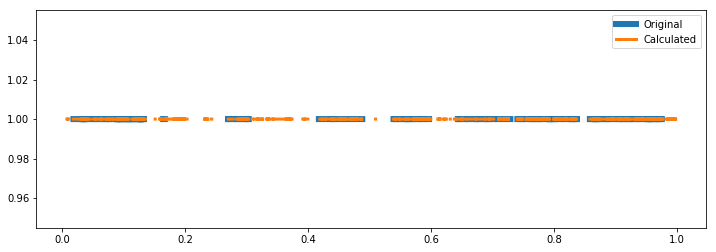

In [13]:
print_labels(np.array(origin).astype('float'), np.array(output).astype('float'))

In [14]:
accuracy = sklearn.metrics.accuracy_score(test_labels, output)
print(accuracy)

0.825006516639
